In [1]:
using Plots
using StaticArrays
using Optim
using ForwardDiff
using Revise
using LinearAlgebra
using Printf

In [2]:
# push!(LOAD_PATH,"/Users/gideonsimpson/code/TestLandscapes.jl/src/")
push!(LOAD_PATH,"/Users/gideonsimpson/code/StringMethod.jl/src/")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/Users/gideonsimpson/code/StringMethod.jl/src/"

In [3]:
using TestLandscapes

In [4]:
V = x-> Muller(x)

#1 (generic function with 1 method)

In [5]:
min1 = optimize(V, [-0.75,1.5])
x1 = min1.minimizer

2-element Array{Float64,1}:
 -0.5582223315786567
  1.441727697793157

In [6]:
min2 = optimize(V, [0.6,0.])
x2 = min2.minimizer

2-element Array{Float64,1}:
 0.6235028759609716
 0.028037347734474527

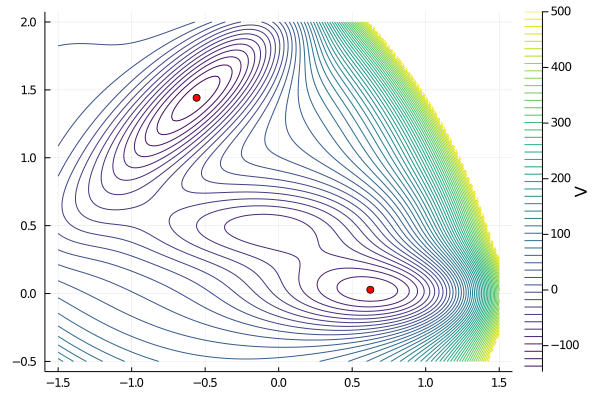

In [7]:
xx =LinRange(-1.5, 1.5,150)
yy = LinRange(-0.5, 2.0,150)
V_vals = [V([x,y]) for y in yy, x in xx];
contour(xx,yy,min.(V_vals,500),
    levels = LinRange(-150,500,50),color=:viridis,colorbar_title="V")
scatter!([x1[1]], [x1[2]],color=:red, label="")
scatter!([x2[1]], [x2[2]],color=:red, label="")

In [8]:
using StringMethod

┌ Info: Precompiling StringMethod [e62e6a7e-3b2b-4391-b20a-030a7103b929]
└ @ Base loading.jl:1278


In [9]:
U₀ = linear_string([0,-0.25], [0,1.5], 10)

10-element Array{Array{Float64,1},1}:
 [0.0, -0.25]
 [0.0, -0.05555555555555555]
 [0.0, 0.13888888888888887]
 [0.0, 0.3333333333333333]
 [0.0, 0.5277777777777777]
 [0.0, 0.7222222222222223]
 [0.0, 0.9166666666666666]
 [0.0, 1.1111111111111112]
 [0.0, 1.3055555555555554]
 [0.0, 1.5]

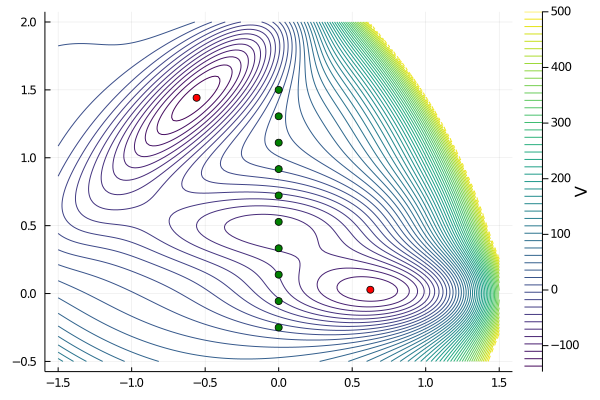

In [10]:
xx =LinRange(-1.5, 1.5,150)
yy = LinRange(-0.5, 2.0,150)
V_vals = [V([x,y]) for y in yy, x in xx];
plt = contour(xx,yy,min.(V_vals,500),
    levels = LinRange(-150,500,50),color=:viridis,colorbar_title="V")
scatter!(plt, [x1[1]], [x1[2]],color=:red, label="")
scatter!(plt, [x2[1]], [x2[2]],color=:red, label="")
for x in U₀
    scatter!(plt, [x[1]], [x[2]],color=:green, label="")
end
plt

In [11]:
∇V! = (gradV, x) -> ForwardDiff.gradient!(gradV, V, x);
Δt = 1e-4;
dist = (u,v)-> norm(u.-v,2);

In [12]:
string = SimplifiedString(∇V!, stepRK4!, spline_reparametrize!, dist, Δt);
opts = StringOptions(verbose=true, save_trajectory=true)

StringOptions(1000, 1.0e-6, true, true)

In [14]:
U_trajectory = simplified_string(U₀, string, options = opts);

[1]: error = 347.573
[2]: error = 400.07
[3]: error = 451.607
[4]: error = 484.238
[5]: error = 477.351
[6]: error = 426.674
[7]: error = 351.815
[8]: error = 285.466
[9]: error = 245.211
[10]: error = 215.398
[11]: error = 193.39
[12]: error = 176.07
[13]: error = 163.766
[14]: error = 155.005
[15]: error = 147.278
[16]: error = 140.507
[17]: error = 134.599
[18]: error = 129.463
[19]: error = 125.008
[20]: error = 121.151
[21]: error = 117.811
[22]: error = 114.91
[23]: error = 112.379
[24]: error = 110.15
[25]: error = 108.162
[26]: error = 106.359
[27]: error = 104.69
[28]: error = 103.111
[29]: error = 101.584
[30]: error = 101.102
[31]: error = 100.451
[32]: error = 99.3838
[33]: error = 97.9777
[34]: error = 96.3172
[35]: error = 94.4921
[36]: error = 95.7088
[37]: error = 96.3349
[38]: error = 96.1643
[39]: error = 95.1223
[40]: error = 93.2
[41]: error = 90.4437
[42]: error = 86.9423
[43]: error = 82.8137
[44]: error = 81.7602
[45]: error = 81.0997
[46]: error = 80.4366
[47]: 

In [194]:
U_trajectory[end]

10-element Array{Array{Float64,1},1}:
 [0.6123656656033009, 0.02875573135271922]
 [0.358360368577369, 0.10301989078372178]
 [0.19791847137754356, 0.3172820539605335]
 [-0.024158270326612215, 0.4650364488228968]
 [-0.2903435807494041, 0.4883585624050341]
 [-0.5415872779466209, 0.5741501733756046]
 [-0.7095194489068628, 0.7825271914171978]
 [-0.8470209844716787, 1.016684480519859]
 [-0.7405494442627187, 1.2543221917246512]
 [-0.5535742334830299, 1.4463795224869602]

In [15]:
xx =LinRange(-1.5, 1.5,150);
yy = LinRange(-0.5, 2.0,150);
V_vals = [V([x,y]) for y in yy, x in xx];

anim =@animate for i in 1:10:length(U_trajectory)
    plt = contour(xx,yy,min.(V_vals,500),
        levels = LinRange(-150,500,50),color=:viridis,colorbar_title="V")
    scatter!(plt, [x1[1]], [x1[2]],color=:red, label="")
    scatter!(plt, [x2[1]], [x2[2]],color=:red, label="")
    for x in U_trajectory[i]
        scatter!(plt, [x[1]], [x[2]],color=:green, label="")
    end
    title!(plt, @sprintf("Iteration %d", i-1))
end

Animation("/var/folders/55/nj7rw6rd0_94ch6cy0sgh9j0mpp4z3/T/jl_oE7JjT", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000062.png", "000063.png", "000064.png", "000065.png", "000066.png", "000067.png", "000068.png", "000069.png", "000070.png", "000071.png"])

┌ Info: Saved animation to 
│   fn = /Users/grs53/code/StringMethod.jl/notebooks/tmp.gif
└ @ Plots /Users/grs53/.julia/packages/Plots/KN96c/src/animation.jl:104


Plots.AnimatedGif("/Users/grs53/code/StringMethod.jl/notebooks/tmp.gif")
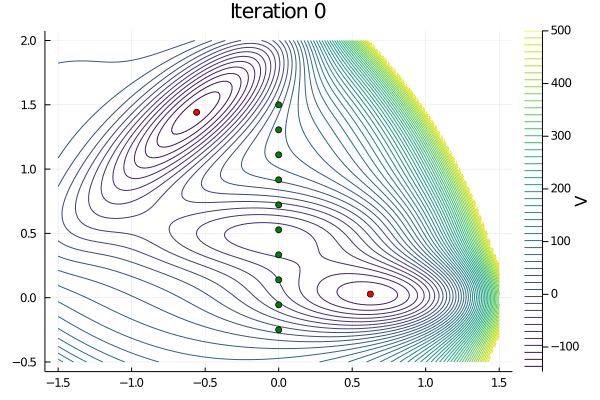

In [16]:
gif(anim, fps=60)

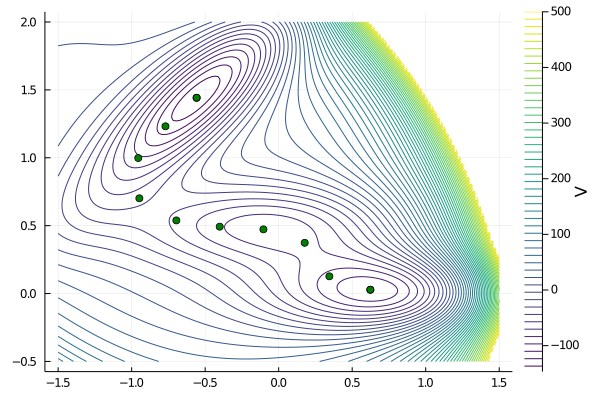

In [18]:
xx =LinRange(-1.5, 1.5,150)
yy = LinRange(-0.5, 2.0,150)
V_vals = [V([x,y]) for y in yy, x in xx];
plt = contour(xx,yy,min.(V_vals,500),
    levels = LinRange(-150,500,50),color=:viridis,colorbar_title="V")
scatter!(plt, [x1[1]], [x1[2]],color=:red, label="")
scatter!(plt, [x2[1]], [x2[2]],color=:red, label="")
for x in U_trajectory[end]
    scatter!(plt, [x[1]], [x[2]],color=:green, label="")
end
plt